## 5. Dense Neural Network II
In this Notebook we create a variety of dense neural network layers and train them in the new randomized data. Surprisingly the results are similar between all models with maximum perfromance at over 99% accuracy. Consistency was not increased much by further randomization of the data done in Notebook 4. 

In [13]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# fix random seed for reproducibility
np.random.seed(7)

train_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Train2\\'
test_path = 'C:\\Users\\Louie\\Data\\Springboard_Cap2\\Test2\\'

#### Create a set of models

In [14]:
def create_model(layers):
    model = Sequential()
    
    for layer in layers:
        model.add(Dense(layer, input_dim=13244, activation='relu'))
    
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
light = [25,10,5]
light_long = [50,40,30,20,10]
medium = [80,50,15]
medium_long = [100,80,70,60,10]
heavy = [200,150,30]
heavy_long = [200,180,150,120,25]

networks = [light, light_long, medium, medium_long, heavy, heavy_long]

In [16]:
models = []

for network in networks:
    models.append(create_model(network))

#### Aggregate data files

In [17]:
import os

train_files = []
test_files = []

for index, file in enumerate(os.listdir(os.fsencode(train_path))):
    train_files.append(str(os.fsdecode(file)))

for index, file in enumerate(os.listdir(os.fsencode(test_path))):
    test_files.append(str(os.fsdecode(file)))

C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  
C:\Users\Louie\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  if __name__ == '__main__':


#### Helper functions for randomizing the testing and training of the model set

In [18]:
def custom_encoder(label):
    if label == 0:
        return np.array([1,0,0])
    elif label == 1:
        return np.array([0,1,0])
    else:
        return np.array([0,0,1])

In [19]:
import random

def train_models(models, train_path, train_files):
    df = pd.read_csv(train_path + random.choice(train_files), index_col=0)
    data = df.iloc[:,:-1]
    labels = np.concatenate(df['13244'].astype(int).apply(custom_encoder).values).reshape(-1,3)
    
    for model in models:
        model.train_on_batch(data, labels)

In [22]:
perfs = [[],[],[],[],[],[]]

def test_models(models, test_path, test_files, perfs):
    df = pd.read_csv(test_path + random.choice(test_files), index_col=0).sample(frac=0.5)
    data = df.iloc[:,:-1]
    labels = np.concatenate(df['13244'].astype(int).apply(custom_encoder).values).reshape(-1,3)
    
    for index, model in enumerate(models):
        score = model.test_on_batch(data, labels)
        perfs[index].append(score[1])

#### Train and track performance of the models

In [23]:
epochs = 150
file_count = 20

for index in range(epochs * file_count):
    train_models(models, train_path, train_files)
    
    if (index + 1) % file_count == 0:
        test_models(models, test_path, test_files, perfs)

for perf in perfs:
    print(max(perf))

0.9918367
0.97959185
0.96734697
0.97959185
0.9632653
0.9846939


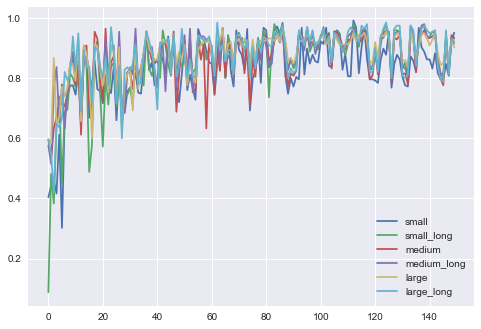

In [27]:
plt.plot(perfs[0], label='small')
plt.plot(perfs[1], label='small_long')
plt.plot(perfs[2], label='medium')
plt.plot(perfs[3], label='medium_long')
plt.plot(perfs[4], label='large')
plt.plot(perfs[5], label='large_long')
plt.legend()

The models performed similarly in both accuracy and consistency for all layer configurations. Also the randomization of the data done in Notebook 4 did not seem to increase performance (it certainly wont hurt though). The next step is to begin experimenting with CNN's in order to optimize performance.